In [1]:
from src.data import CICIDS2017
from src.data.utils import balanced_sample, encode_labels
from sklearn.model_selection import train_test_split
from src.models.tabnet import TabNetModel
from src.pipelines.utils import train_and_evaluate, plot_accuracies

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
data = CICIDS2017()
data.load()
data = balanced_sample(data.data, "Label", 100)
# x, y = encode_labels(data, "Label")
x = data.drop(columns=["Label"]).values
y = data["Label"].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

2025-03-06 03:39:46,734 - INFO - Loading dataset...
2025-03-06 03:39:46,735 - INFO - Downloading dataset from http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip...
2025-03-06 03:40:00,185 - INFO - c:\Users\pablo\OneDrive\Escritorio\TFG\code\TFG\data\CIC-IDS2017\MachineLearningCVE\dataset.csv not found. Creating dataset from individual CSV files in c:\Users\pablo\OneDrive\Escritorio\TFG\code\TFG\data\CIC-IDS2017\MachineLearningCVE.
2025-03-06 03:40:55,130 - INFO - Starting preprocessing...
2025-03-06 03:40:55,131 - INFO - Feature names corrected.
2025-03-06 03:41:06,427 - INFO - Duplicates dropped.
c:\Users\pablo\OneDrive\Escritorio\TFG\code\TFG\src\data\cic_ids2017.py:106: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [3]:
tabnet = TabNetModel()

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


2025-03-06 03:43:06,386 - INFO - Pretraining for TabNet...


epoch 0  | loss: 412.96514| val_0_unsup_loss_numpy: 33.85588836669922|  0:00:00s
epoch 1  | loss: 97.67322| val_0_unsup_loss_numpy: 89.3790512084961|  0:00:00s
epoch 2  | loss: 43.72225| val_0_unsup_loss_numpy: 10.83782958984375|  0:00:01s
epoch 3  | loss: 15.5068 | val_0_unsup_loss_numpy: 11.342599868774414|  0:00:01s
epoch 4  | loss: 4.34945 | val_0_unsup_loss_numpy: 5.681960105895996|  0:00:02s
epoch 5  | loss: 1.62802 | val_0_unsup_loss_numpy: 1.090999960899353|  0:00:02s
epoch 6  | loss: 1.31123 | val_0_unsup_loss_numpy: 1.125730037689209|  0:00:03s
epoch 7  | loss: 1.13741 | val_0_unsup_loss_numpy: 1.7429800033569336|  0:00:03s
epoch 8  | loss: 1.41969 | val_0_unsup_loss_numpy: 1.0127400159835815|  0:00:03s
epoch 9  | loss: 1.13932 | val_0_unsup_loss_numpy: 0.9526799917221069|  0:00:04s
epoch 10 | loss: 1.04683 | val_0_unsup_loss_numpy: 0.940090000629425|  0:00:04s
epoch 11 | loss: 1.07643 | val_0_unsup_loss_numpy: 1.0875699520111084|  0:00:04s
epoch 12 | loss: 1.29405 | val_0_un

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-03-06 03:43:15,384 - INFO - Training TabNet model...


epoch 19 | loss: 0.99511 | val_0_unsup_loss_numpy: 1.1080100536346436|  0:00:08s
Stop training because you reached max_epochs = 20 with best_epoch = 10 and best_val_0_unsup_loss_numpy = 0.940090000629425


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 2.99062 | val_accuracy: 0.14961 |  0:00:00s
epoch 1  | loss: 2.28569 | val_accuracy: 0.31496 |  0:00:00s
epoch 2  | loss: 2.05802 | val_accuracy: 0.2874  |  0:00:00s
epoch 3  | loss: 1.84789 | val_accuracy: 0.34252 |  0:00:01s
epoch 4  | loss: 1.58641 | val_accuracy: 0.45669 |  0:00:01s
epoch 5  | loss: 1.65651 | val_accuracy: 0.46063 |  0:00:01s
epoch 6  | loss: 1.42281 | val_accuracy: 0.45669 |  0:00:02s
epoch 7  | loss: 1.21187 | val_accuracy: 0.59055 |  0:00:02s
epoch 8  | loss: 1.26273 | val_accuracy: 0.52756 |  0:00:02s
epoch 9  | loss: 1.19601 | val_accuracy: 0.59843 |  0:00:02s
epoch 10 | loss: 1.19297 | val_accuracy: 0.46063 |  0:00:03s
epoch 11 | loss: 1.09587 | val_accuracy: 0.44882 |  0:00:03s
epoch 12 | loss: 1.07816 | val_accuracy: 0.54724 |  0:00:03s
epoch 13 | loss: 1.10947 | val_accuracy: 0.69291 |  0:00:04s
epoch 14 | loss: 1.13174 | val_accuracy: 0.59843 |  0:00:04s
epoch 15 | loss: 1.01452 | val_accuracy: 0.66535 |  0:00:04s
epoch 16 | loss: 0.99375

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-03-06 03:43:28,021 - INFO - Train Accuracy: 0.7850
2025-03-06 03:43:28,022 - INFO - Validation Accuracy: 0.7756


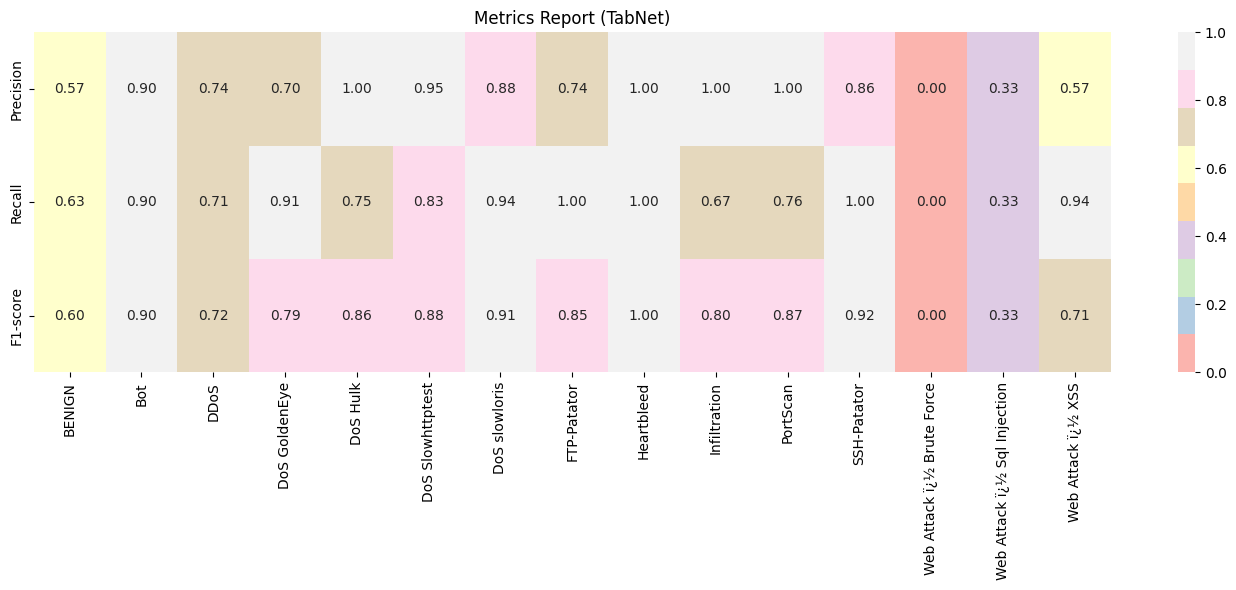

In [4]:
tabnet_results = train_and_evaluate(
    tabnet,
    "TabNet",
    X_train,
    y_train,
    X_test,
    y_test,
)

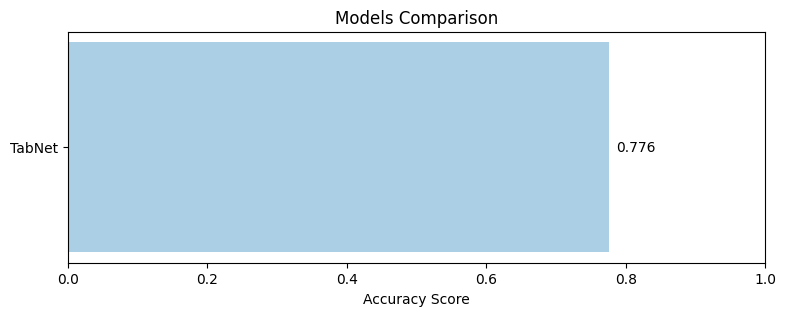

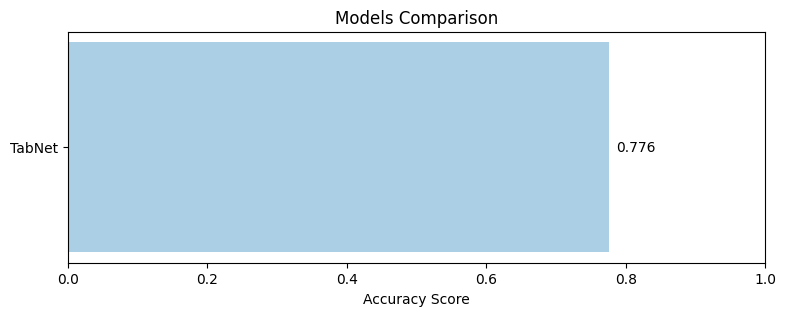

In [5]:
accuracies = [tabnet_results["accuracy"]]
plot_accuracies(accuracies, ["TabNet"])